### Dependências

In [79]:
#from sklearn.dummy import DummyClassifier           # Modelo base
#from sklearn.neighbors import KNeighborsClassifier  # k-vizinhos mais próximos (KNN)
#from sklearn.ensemble import RandomForestClassifier # RandomForest
#from sklearn.ensemble import GradientBoostingClassifier # GradientBoosting
#from sklearn.svm import SVC                         # Maquina de Vetor Suporte SVM
#from sklearn.neural_network import MLPClassifier    # Multlayer Perceptron
#from sklearn.naive_bayes import GaussianNB          # Naive Bayes
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler   # Escalonador
import folium
import random as rnd
import numpy as np
import pandas as pd

### Marcadores 

In [18]:
# Um marcador será definido por um objeto marcador

class Marcador:
    def __init__(self, ident, cords, tpo, lt):
        self.ident = ident # identificador do medidor
        self.cords = cords # coordenadas do medidor
        self.tpo = tpo # Tipo do medidor ( Mecanico, digital) + Marca e detalhes
        self.lt = lt # Leitura atual do medidor
        
    def leitura(self): # Evolui a Leitura no tempo
        j = 0
        C = rnd.uniform(0, 10) # Constante em kWh
        n_sim = 20 # número de iterações do programa
        prel = np.linspace(0, n_sim, 20)
        prel = prel.tolist() # Medidas de cada medidor a cada iteração
        for i in range(0, len(prel)):
            prel[i] = prel[i] + C
        while n_sim >= 0 and j <= 20:
            if self.Evl():
                self.lt = prel[j]
                j = j + 1
            n_sim = n_sim - 1
                              
    def Evl():
        # condição de evolução do sistema
        i = rnd(0, 30)
        if i <=20 :
            return True
        else:
            return False
            
        
        
        
            
        
              

### Criação dos marcadores

In [26]:
def new_Marks(n):
    lat_sp = -23.550520
    lon_sp = -46.633308
    marks = []
    
    for i in range(n):
        lat = lat_sp + rnd.uniform(-0.1, 0.1)
        lon = lon_sp + rnd.uniform(-0.1, 0.1)
        mark = Marcador(ident=f"Medidor_{i+1}", cords=(lat, lon), tpo="Digital", lt=0)
        marks.append(mark)
    return marks
marks = new_Marks(60)
print(marks) 

[<__main__.Marcador object at 0x7f87eb7cb160>, <__main__.Marcador object at 0x7f87eb7cb880>, <__main__.Marcador object at 0x7f87eb7cad70>, <__main__.Marcador object at 0x7f87eb7cb910>, <__main__.Marcador object at 0x7f87eb7cb400>, <__main__.Marcador object at 0x7f87eb7cb040>, <__main__.Marcador object at 0x7f87eb7cafb0>, <__main__.Marcador object at 0x7f87eb7ca950>, <__main__.Marcador object at 0x7f87eb7cb520>, <__main__.Marcador object at 0x7f87eb7cae90>, <__main__.Marcador object at 0x7f87eb7cba30>, <__main__.Marcador object at 0x7f87eb7cab30>, <__main__.Marcador object at 0x7f87eb7ca9b0>, <__main__.Marcador object at 0x7f87eb7cac20>, <__main__.Marcador object at 0x7f87eb7caf50>, <__main__.Marcador object at 0x7f87eb7cad10>, <__main__.Marcador object at 0x7f87eb7caad0>, <__main__.Marcador object at 0x7f87eb7cb550>, <__main__.Marcador object at 0x7f87eb7caa70>, <__main__.Marcador object at 0x7f87eb7cb130>, <__main__.Marcador object at 0x7f87eb7ca980>, <__main__.Marcador object at 0x7f

### Mapa feito no Folium

In [28]:

m = folium.Map(location=(-23.5536712,-46.690168), zoom_start=12)
for mark in marks:
    folium.Marker(location= mark.cords, popup=f"{mark.ident}: {mark.tpo}, Leitura: {mark.lt}").add_to(m)


m.save('mapa_test.html')
m

## Análise individual
-------
Aqui pegamos 1 dos marcadores e avaliamos as medidas individuais dele. Setorizamos elas por dia do ano, assím quebrando elas em padrões sazonais (dentro do ano de 2015) onde serão avaliados se há ou não gatos, oque seá usado para treinar o modelo treinando o modelo

Fonte dos dados https://www.kaggle.com/datasets/avinemmatty/theft-data/data

In [45]:
# Vamos supor que cada marcador gera de entrada uma planilha do seguinte tipo

df = pd.read_excel('DadosGatos.xlsx', sheet_name='Electricity_Theft_Data')
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column358,Column359,Column360,Column361,Column362,Column363,Column364,Column365,Column366,Column367
0,CONS_NO,01-01-15,02-01-15,03-01-15,04-01-15,05-01-15,06-01-15,07-01-15,08-01-15,09-01-15,...,23-12-15,24-12-15,25-12-15,26-12-15,27-12-15,28-12-15,29-12-15,30-12-15,31-12-15,CHK_STATE
1,NaN,1,2,3,4,5,6,7,8,9,...,357,358,359,360,361,362,363,364,365,NaN
2,8546920085,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,617718257,1.12,1.73,3.34,2.77,3.5,2.86,1.25,1.12,1.51,...,17.31,15.95,17,32.05,28.72,31.11,28.47,16.7,14.96,1
4,7222500051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,6460203016,3.46,2.83,3.735,3.735,2.65,3.56,3.42,3.39,3.65,...,5.32,5.19,6.04,7.89,6.56,3.9,7.05,5.11,8.07,0
9954,372100023,8.39,6.49,5.34,7.28,5.55,3.89,5.36,5.69,4.95,...,7.91,7.43,6.34,10.34,6.04,7.75,7.49,7.96,9.35,0
9955,1069130457,11.33,3.47,4.37,7.37,5.76,5.16,5.79,7.41,5.33,...,5.17,3.97,7.72,3.31,4.58,4.95,3.46,3.59,5.43,0
9956,5571700316,13.8,11.22,13.17,10.88,13.52,13.91,15.35,10.73,11.78,...,12.22,11.58,12.03,12.43,16.79,13.18,13.01,10.97,14.96,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


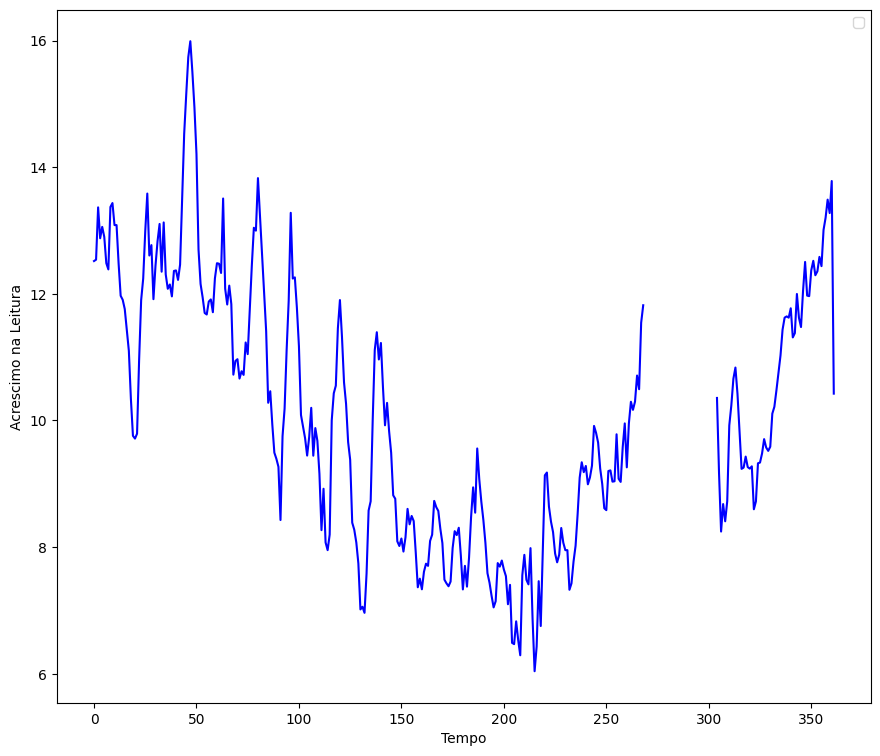

In [117]:
import matplotlib.pyplot as plt
# Plot para o ano inteiro
R = []
MM = []
RMM = []
L = []
#D = []
F = []
L = df.iloc[9956].tolist()
#D = df_pri.iloc[0].to_list()
del L[0]
#del D[0]
R = range(len(L))
for ele in L:
    F.append(float(ele))

# Média móvel

for w in range(0, len(F)):
    if w+4 >= len(F):
        continue
    else:
        MM.append((F[w] + F[w+1] + F[w+2] + F[w+3] + F[w+4])/5)
RMM = range(len(MM))

plt.figure(figsize=(10.5, 9))

#plt.plot(R, F, marker='.', color='Black')
plt.plot(RMM, MM, marker = '', color='Blue' )
plt.xlabel('Tempo')
plt.ylabel('Acrescimo na Leitura')
#plt.grid()
plt.legend()
plt.show()

### Agrupamento dos dados por estação

In [42]:
df_pri = pd.DataFrame()
df_ver = pd.DataFrame()
df_out = pd.DataFrame()
df_inv = pd.DataFrame()
for i in range(2, 366):
    s = f'Column{i}'
    d = []
    j = 0
    data = df[s][0]
    for alg in data:
        if alg != '-' and j > 1 and j < 5:
            d.append(alg)
        j = j +1
    data = d[0] + d[1] # data corresponde ao mês
    
    if int(data) >= 3 and int(data) <= 6:
        df_pri = pd.concat([df_pri, df[[s]]], axis=1)
    elif int(data) >= 7 and int(data) <= 9:
        df_ver = pd.concat([df_ver, df[[s]]], axis=1)
    elif int(data) >= 10 and int(data) <= 12:
        df_out = pd.concat([df_out, df[[s]]], axis=1)
    else:
        df_inv = pd.concat([df_inv, df[[s]]], axis=1)
             
        
    #print(int(data), '\n ---')
    


### Análisando os dados para cada estação 
-----
Vamos mostrar os padrões de consumo para a 9956 em cada estação

#### Primavera

In [43]:
df_pri

,Column61,Column62,Column63,Column64,Column65,Column66,Column67,Column68,Column69,Column70,...,Column173,Column174,Column175,Column176,Column177,Column178,Column179,Column180,Column181,Column182
0,01-03-15,02-03-15,03-03-15,04-03-15,05-03-15,06-03-15,07-03-15,08-03-15,09-03-15,10-03-15,...,21-06-15,22-06-15,23-06-15,24-06-15,25-06-15,26-06-15,27-06-15,28-06-15,29-06-15,30-06-15
1,60,61,62,63,64,65,66,67,68,69,...,172,173,174,175,176,177,178,179,180,181
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.02,0.06,0.09,0,0,0,0
3,1.83,2.09,2.4,2.39,4.77,5.39,4.49,2.53,4.42,4.2,...,7.09,7.46,4.93,8.04,8.91,7,9.11,7.78,7.78,8.24
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,7.9,9.86,10.87,8.9,8.3,7.19,9.5,9.39,8.93,7.27,...,7.29,6.07,6.12,6.7,5.86,6.09,6.23,5.54,5.58,6.5
9954,7.1,4.49,5.85,4.42,5.83,7.59,5.1,7.28,5.77,10.64,...,6.98,7.05,5.13,6.08,4.45,6.59,7.32,7.98,7.31,5.67
9955,0.08,0.08,0.08,0.08,0.08,4.88,6.18,6.86,4.37,7.09,...,1.18,1.43,1.21,1.69,1.13,1.86,1.19,1.23,3.22,1.73
9956,11.65,10.04,12.67,10.78,16.09,12.84,10,11.94,16.66,8.97,...,7.34,7.71,8.2,6.9,7.28,7.05,7.48,8.57,9.55,8.61


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


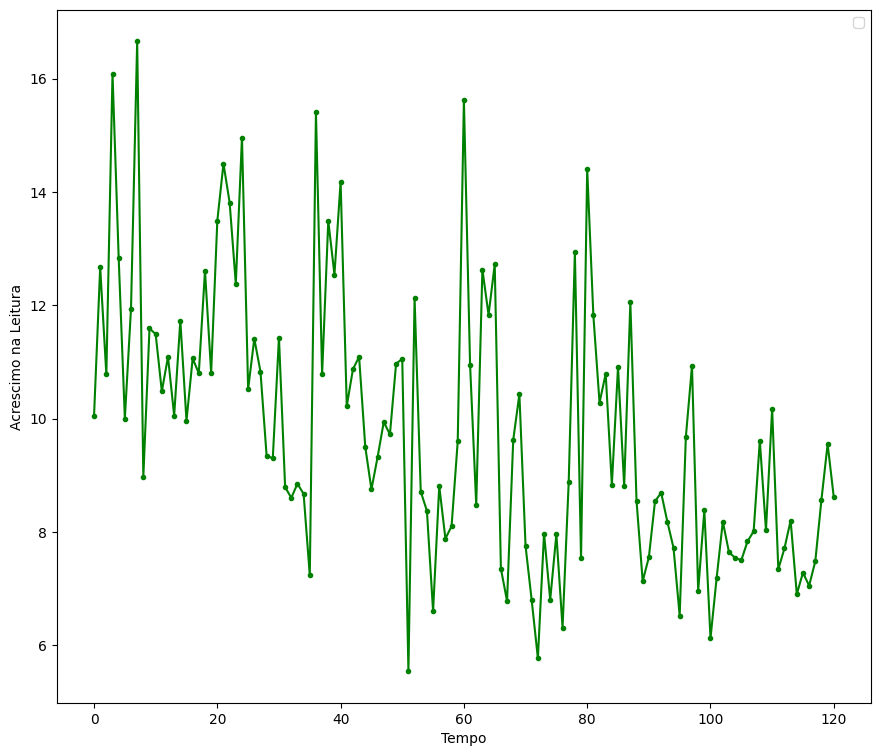

MAE , R2 
 1.6155078102333804 0.322290982788065
    Valores Teste      Valores Preditos
0           15.41  [11.111380452031007]
1            9.62   [9.841881593676895]
2            8.20   [8.056648824116422]
3            9.72  [10.635318380148215]
4            8.01   [8.294679860057819]
..            ...                   ...
79           9.34  [11.428755166619535]
80           6.52   [8.770741931940611]
81           9.96  [11.944489077825894]
82           7.55   [8.969101128558442]
83           8.38   [8.612054574646347]

[84 rows x 2 columns]

 Modelo aplicado aos dados de teste : 

MAE , R2 
 1.6176692366147554 0.01687454559965429
    Valores Teste      Valores Preditos
0            8.37  [10.397287344206818]
1            6.31   [9.524506879088365]
2            7.23  [11.151052291354572]
3            7.19   [8.532710895999214]
4            7.48   [7.897961466822158]
5            5.77    [9.68319423638263]
6           10.00  [12.341207471061553]
7            6.60  [10.357615504883253

In [112]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score 
R = []
L = []
#D = []
F = []
L = df_pri.iloc[9956].tolist()
#D = df_pri.iloc[0].to_list()
del L[0]
#del D[0]
R = range(len(L))
for ele in L:
    F.append(float(ele))

plt.figure(figsize=(10.5, 9))

plt.plot(R, F, marker='.', color='Green')
plt.xlabel('Tempo')
plt.ylabel('Acrescimo na Leitura')
#plt.grid()
plt.legend()
plt.show()

def treino():
    
    dftr = pd.DataFrame({'x' : R, 'y' : F})
    x = dftr[['x']]
    y = dftr[['y']]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 20)
    scal = MinMaxScaler()
    scal.fit(x_train)

    x_test_s = scal.transform(x_test)
    x_train_s = scal.transform(x_train)
    lr = LinearRegression()
    lr.fit(x_train_s, y_train)
    y_pred = lr.predict(x_train_s)
    y_pred = y_pred.tolist()
    gaps = y_train['y'].tolist()
    MAE = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    print('MAE , R2 \n', MAE, r2)
    df2 = pd.DataFrame({'Valores Teste': gaps, 'Valores Preditos': y_pred})
    print(df2)
    
    print('\n Modelo aplicado aos dados de teste : \n')
    y_pred2 = lr.predict(x_test_s)
    y_pred2 = y_pred2.tolist()
    gaps2 = y_test['y'].tolist()
    MAE = mean_absolute_error(y_test, y_pred2)
    r2 = r2_score(y_test, y_pred2)
    print('MAE , R2 \n', MAE, r2)
    df3 = pd.DataFrame({'Valores Teste': gaps2, 'Valores Preditos': y_pred2})
    print(df3)
    
treino()

#### Verão

In [63]:
df_ver

,Column183,Column184,Column185,Column186,Column187,Column188,Column189,Column190,Column191,Column192,...,Column265,Column266,Column267,Column268,Column269,Column270,Column271,Column272,Column273,Column274
0,01-07-15,02-07-15,03-07-15,04-07-15,05-07-15,06-07-15,07-07-15,08-07-15,09-07-15,10-07-15,...,21-09-15,22-09-15,23-09-15,24-09-15,25-09-15,26-09-15,27-09-15,28-09-15,29-09-15,30-09-15
1,182,183,184,185,186,187,188,189,190,191,...,264,265,266,267,268,269,270,271,272,273
2,0,0.01,0,0,0,0,0.03,0,0,0,...,0.01,0.02,0,0,0.06,0.05,0,0.04,0,0
3,9.98,5.28,5.58,6.85,5.86,5.73,5.43,10.6,6.67,6.54,...,5.01,4.37,4.69,3.81,5.46,6.63,5.24,4.6,4.4,4.92
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,5.65,6.59,5.8,6.4,5.76,6.25,7.24,6.77,7.26,4.92,...,5.36,4.68,5.66,5.23,8.53,4.25,5.32,4.45,5.75,5.41
9954,6.17,7.29,6.49,6.96,6.26,7.57,6.63,7.1,5.48,5.8,...,5.76,5.14,5.7,5.17,4.8,6.48,4.87,6.33,5.99,7.08
9955,1.5,1.82,0.84,0,0,0,0,0,0,2.07,...,2.6,2.96,2.41,1.71,1.65,2.59,6.09,2.25,1.4,2.83
9956,6.74,8.06,6.39,6.86,10.47,5.1,10.33,9.61,9.21,8.47,...,11.51,8.42,11.26,9.55,10.1,12.16,10.48,10.18,14.8,11.48


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


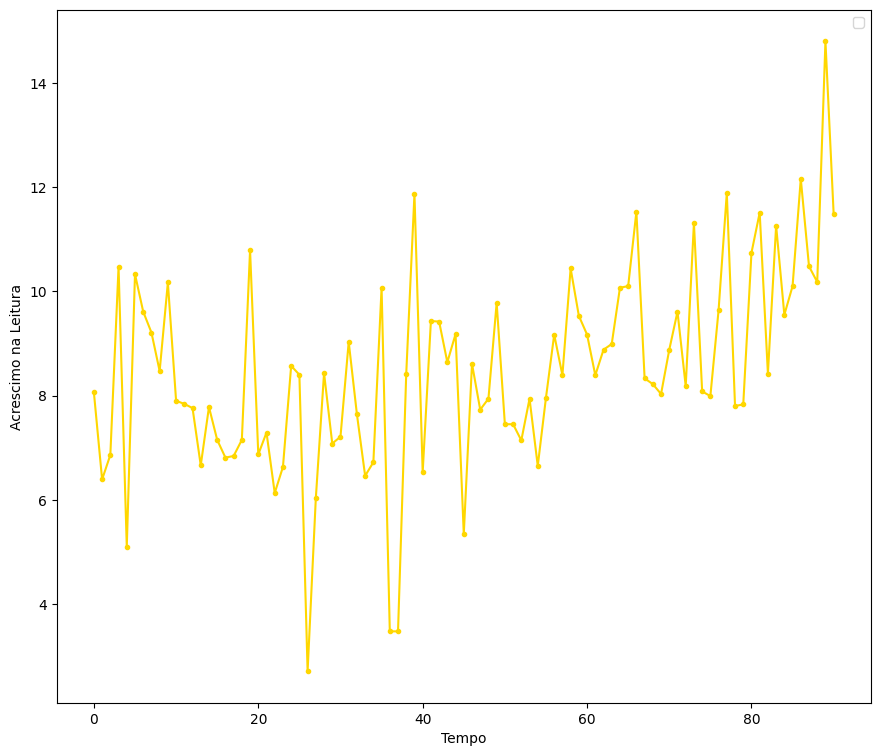

MAE , R2 
 1.2364292857563792 0.23414839354729677
    Valores Teste      Valores Preditos
0           11.87   [8.241251320968404]
1            7.96   [8.815874211905266]
2            6.65   [8.779960281221712]
3            8.42   [8.205337390284852]
4            8.47   [7.127919469778236]
..            ...                   ...
58           6.87   [7.558886637980883]
59          10.17    [7.16383340046179]
60           8.43   [7.846198083449313]
61           7.15   [7.379316984563113]
62          11.48  [10.072861785829648]

[63 rows x 2 columns]

 Modelo aplicado aos dados de teste : 

MAE , R2 
 1.4655597836830563 0.18930480041553444
    Valores Teste      Valores Preditos
0           7.940   [8.744046350538158]
1           6.860  [6.9124358856769135]
2           7.760   [7.271575192512452]
3          12.160   [9.929206063095434]
4          10.480   [9.965119993778988]
5           7.450   [8.636304558487497]
6           9.180   [8.420820974386174]
7           6.630   [7.6666284300315

In [113]:
R = []
L = []
#D = []
F = []
L = df_ver.iloc[9956].tolist()
#D = df_pri.iloc[0].to_list()
del L[0]
#del D[0]
R = range(len(L))
for ele in L:
    F.append(float(ele))

plt.figure(figsize=(10.5, 9))

plt.plot(R, F, marker='.', color='Gold')
plt.xlabel('Tempo')
plt.ylabel('Acrescimo na Leitura')
#plt.grid()
plt.legend()
plt.show()
treino()

### Outono

In [100]:
df_out

,Column275,Column276,Column277,Column278,Column279,Column280,Column281,Column282,Column283,Column284,...,Column356,Column357,Column358,Column359,Column360,Column361,Column362,Column363,Column364,Column365
0,01-10-15,02-10-15,03-10-15,04-10-15,05-10-15,06-10-15,07-10-15,08-10-15,09-10-15,10-10-15,...,21-12-15,22-12-15,23-12-15,24-12-15,25-12-15,26-12-15,27-12-15,28-12-15,29-12-15,30-12-15
1,274,275,276,277,278,279,280,281,282,283,...,355,356,357,358,359,360,361,362,363,364
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.01,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.89,22.69,17.31,15.95,17,32.05,28.72,31.11,28.47,16.7
4,0,0,0,0,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.15,5.67,5.32,5.19,6.04,7.89,6.56,3.9,7.05,5.11
9954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.5,6.94,7.91,7.43,6.34,10.34,6.04,7.75,7.49,7.96
9955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.51,5.35,5.17,3.97,7.72,3.31,4.58,4.95,3.46,3.59
9956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.16,13.93,12.22,11.58,12.03,12.43,16.79,13.18,13.01,10.97


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


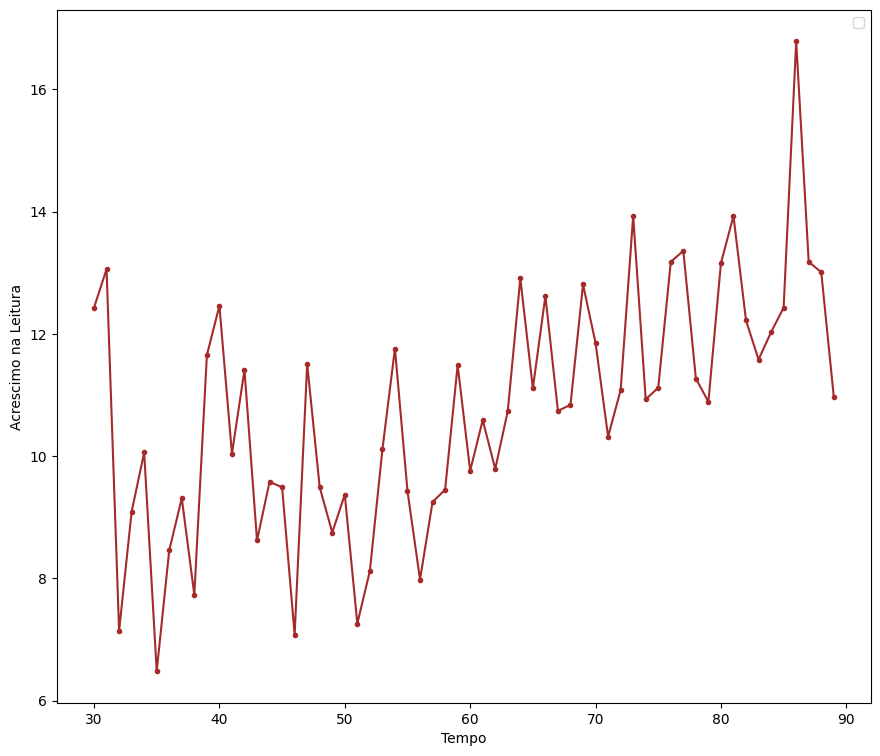

In [114]:
R = []
L = []
#D = []
F = []
L = df_out.iloc[9956].tolist()
#D = df_pri.iloc[0].to_list()
del L[0]
#del D[0]
R = range(len(L))
for ele in L:
    F.append(float(ele))

plt.figure(figsize=(10.5, 9))

plt.plot(R, F, marker='.', color='Brown')
plt.xlabel('Tempo')
plt.ylabel('Acrescimo na Leitura')
#plt.grid()
plt.legend()
plt.show()
#treino()

### Inverno

In [115]:
df_inv

,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,...,Column51,Column52,Column53,Column54,Column55,Column56,Column57,Column58,Column59,Column60
0,01-01-15,02-01-15,03-01-15,04-01-15,05-01-15,06-01-15,07-01-15,08-01-15,09-01-15,10-01-15,...,19-02-15,20-02-15,21-02-15,22-02-15,23-02-15,24-02-15,25-02-15,26-02-15,27-02-15,28-02-15
1,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,59
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.12,1.73,3.34,2.77,3.5,2.86,1.25,1.12,1.51,1.69,...,3.92,4.78,3.13,2.29,5.01,3.88,2.38,1.79,2.47,2.45
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,3.46,2.83,3.735,3.735,2.65,3.56,3.42,3.39,3.65,3.66,...,10.77,10,7.24,8.61,10.98,4.39,7.51,6.32,9.52,10.09
9954,8.39,6.49,5.34,7.28,5.55,3.89,5.36,5.69,4.95,4.81,...,6.74,6.19,5.18,6.02,6.47,5.49,6.6,7.79,5.81,6.59
9955,11.33,3.47,4.37,7.37,5.76,5.16,5.79,7.41,5.33,9.53,...,0.08,0.08,0.08,0.09,0.08,0.08,0.09,0.08,0.08,0.08
9956,13.8,11.22,13.17,10.88,13.52,13.91,15.35,10.73,11.78,12.73,...,15.46,16.57,15.21,12.84,14.65,11.77,9.02,12.5,11.79,13.41


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


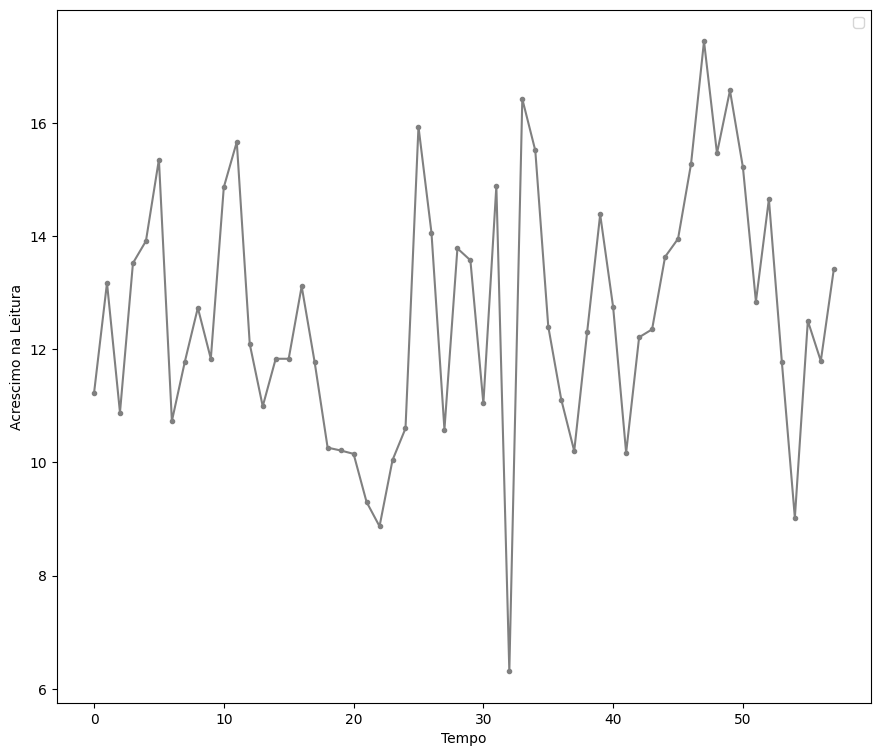

MAE , R2 
 1.8749926896630444 0.05901892722917257
    Valores Teste      Valores Preditos
0           15.21   [13.49195937378254]
1           13.41  [13.751367276192273]
2           11.04  [12.750793938326165]
3           10.58  [12.639619123007709]
4           11.22  [11.639045785141603]
5           11.83  [12.157861589961065]
6           13.63  [13.269609743145628]
7           13.95  [13.306668014918447]
8            9.02  [13.640192460873816]
9           14.86   [12.00962850286979]
10          13.52   [11.75022060046006]
11          15.93  [12.565502579462072]
12          16.42  [12.861968753644621]
13          16.57  [13.454901102009721]
14          10.99  [12.120803318188246]
15          10.17  [13.158434927827171]
16          10.73  [11.861395415778516]
17          15.27  [13.343726286691265]
18          17.44  [13.380784558464084]
19          14.38  [13.084318384281534]
20          12.31  [13.047260112508715]
21          13.11  [12.231978133506702]
22          10.21  [12.3431529

In [116]:
R = []
L = []
#D = []
F = []
L = df_inv.iloc[9956].tolist()
#D = df_pri.iloc[0].to_list()
del L[0]
#del D[0]
R = range(len(L))
for ele in L:
    F.append(float(ele))

plt.figure(figsize=(10.5, 9))

plt.plot(R, F, marker='.', color='Gray')
plt.xlabel('Tempo')
plt.ylabel('Acrescimo na Leitura')
#plt.grid()
plt.legend()
plt.show()
treino()

##### Logo o nosso código aprendeu os padrões de consumo dessa família ao longo das épocas do ano agora oque falta ser feito é usar esses padrões como métricas para observar desvios e classificar esses desvios como gatos ou não. Isso exigiria dados que não temos (Dados para outros anos). Também podemos considerar a análise dos fluxos de potência, para isso precisamos de dados de geolocalização dos marcadores(Que não temos). Para classificar dados desse dataset como gatos ou não, precisariamos que algo que indicasse quais são os gatos para treinar o classificador porém isso não é possível pois não temos essas informações